In [2]:
import pandas as pd  # начинаем с так сказать базы
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('spotify_top_songs_audio_features.csv')
df

,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
0,000xQL6tZNLJzIrtIgxqSl,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,0.0639,0.13100,0.000000,0.0852,0.524,-6.029,120.963,188491,17,107527761
1,003eoIwxETJujVWmNFMoZy,Alessia Cara,Growing Pains,Def Jam Recordings,C#/Db,Minor,4 beats,0.353,0.755,0.7330,0.08220,0.000000,0.3900,0.437,-6.276,191.153,193680,2,9944865
2,003vvx7Niy0yvhvHt4a68B,The Killers,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,0.0747,0.00121,0.000000,0.0995,0.236,-5.230,148.033,222973,125,512388123
3,00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,0.5530,0.28700,0.000000,0.3140,0.665,-7.438,167.911,284856,2,11985346
4,00Blm7zeNqgYLPtW6zg8cj,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,0.0530,0.03610,0.000000,0.0755,0.688,-4.806,97.014,193507,30,301860377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,7zgqtptZvhf8GEmdsM2vp2,Taylor Swift,...Ready For It?,"Big Machine Records, LLC",D,Major,4 beats,0.615,0.779,0.1350,0.06650,0.000000,0.1550,0.453,-6.454,160.000,208198,1,17583532
6509,7zjEyeBsaw9gV0jofJLfOM,"Young Thug, A$AP Rocky, Post Malone",Livin It Up (with Post Malone & A$AP Rocky),300 Entertainment/Atl,G,Major,4 beats,0.767,0.313,0.0798,0.83800,0.000000,0.1050,0.765,-12.059,82.582,210907,2,10526635
6510,7zl7kehxesNEo2pYkKXTSe,"Eminem, Jack Harlow, Cordae",Killer (feat. Jack Harlow & Cordae) - Remix,Shady/Aftermath/Interscope Records,B,Minor,4 beats,0.924,0.730,0.2740,0.05250,0.000000,0.1130,0.848,-6.125,99.010,236666,1,5404939
6511,7zvfDihYiJ8RQ1nRcpKBF5,"Kendrick Lamar, Tanna Leone",Mr. Morale,pgLang/Top Dawg Entertainment/Aftermath/Inters...,A,Major,3 beats,0.727,0.530,0.3120,0.28300,0.000028,0.3920,0.258,-8.616,174.025,210841,1,12872010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6513 entries, 0 to 6512
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                6513 non-null   object 
 1   artist_names      6513 non-null   object 
 2   track_name        6513 non-null   object 
 3   source            6513 non-null   object 
 4   key               6513 non-null   object 
 5   mode              6513 non-null   object 
 6   time_signature    6513 non-null   object 
 7   danceability      6513 non-null   float64
 8   energy            6513 non-null   float64
 9   speechiness       6513 non-null   float64
 10  acousticness      6513 non-null   float64
 11  instrumentalness  6513 non-null   float64
 12  liveness          6513 non-null   float64
 13  valence           6513 non-null   float64
 14  loudness          6513 non-null   float64
 15  tempo             6513 non-null   float64
 16  duration_ms       6513 non-null   int64  


# Чистим данные

Штош, как мы видим по инфо, пропусков нет вообще, давайте теперь посмотрим, есть ли странные значения.
Сначала посмотрим на кол-во уникальных значений в каждом столбце.

In [6]:
df.nunique()

id                  6513
artist_names        3001
track_name          5351
source               967
key                   12
mode                   2
time_signature         4
danceability         686
energy               805
speechiness         1146
acousticness        2020
instrumentalness    1833
liveness            1071
valence             1013
loudness            4255
tempo               5353
duration_ms         5460
weeks_on_chart       159
streams             6513
dtype: int64

Отлично, в ID кол-во уникальных значений совпадает с кол-вом строк датасета, значит дубликатов быть не должно. Но на всякий случай проверим:

In [7]:
len(df)-len(df.drop_duplicates())

0

На самом деле, у нас есть дубликаты в названиях песен, но дело в том, что этот датасет содержит информацию о топ-200 треках в Спотифае за каждую неделю с 2016, поэтому мы ничего с этим не делаем. Также у нас есть странное значение в time_signature и мы его сейчас заменим на МЦТ.

In [6]:
# вот о каком значении речь:
df['time_signature'].value_counts()

4 beats    6057
3 beats     324
5 beats     107
1            25
Name: time_signature, dtype: int64

In [9]:
# значение 1, которое мы можем считать пропуском, мы заменим на моду
ts_mode = df['time_signature'].mode()
df['time_signature'] = df['time_signature'].apply(lambda x: ts_mode if x == '1' else x)
df.loc[363] # посмотрим строку, в которой изначально было time_signature = 1

id                   0ROE31C8Wu4neZoR9stM9e
artist_names                   Lil Uzi Vert
track_name                           Sasuke
source              Generation Now/Atlantic
key                                   C#/Db
mode                                  Major
time_signature                      4 beats
danceability                          0.859
energy                                0.477
speechiness                           0.428
acousticness                        0.00414
instrumentalness                        0.0
liveness                             0.0819
valence                               0.153
loudness                             -6.116
tempo                               145.979
duration_ms                          251336
weeks_on_chart                            1
streams                             4701551
Name: 363, dtype: object

# Выбросы
### ...и почему мы не будем их удалять

In [10]:
# отлично, теперь разберемся с выбросами в числовых переменных

print(df['streams'].mean())
print(df['streams'].median())

108964720.98955934
27128557.0


In [11]:
print(df['weeks_on_chart'].mean())
print(df['weeks_on_chart'].median())

13.614923998157531
4.0


In [12]:
print(df['duration_ms'].mean())
print(df['duration_ms'].median())

202566.6841701213
198367.0


In [13]:
print(df['tempo'].mean())
print(df['tempo'].median())

122.11724366651292
120.034


In [14]:
print(df['loudness'].mean())
print(df['loudness'].median())

-6.350666513127599
-5.983


In [15]:
print(df['valence'].mean())
print(df['valence'].median())

0.4924116996775677
0.489


In [16]:
print(df['liveness'].mean())
print(df['liveness'].median())

0.18016814064179354
0.124


In [17]:
print(df['instrumentalness'].mean())
print(df['instrumentalness'].median())

0.01246869126055579
0.0


In [18]:
print(df['speechiness'].mean())
print(df['speechiness'].median())

0.1219331183786272
0.0722


In [19]:
print(df['energy'].mean())
print(df['energy'].median())

0.6365222785198836
0.651


In [20]:
print(df['danceability'].mean())
print(df['danceability'].median())

0.6817306924612307
0.698


Итак, видим, что выбросы точно есть в кол-ве прослушиваний, недель в чарте и "говорильности". В исследовательских целях думаю стоит их оставить, потому что по этим данным мы можем как раз посмотреть, есть ли какие-то корреляции между параметрами трека и его популярностью, например.

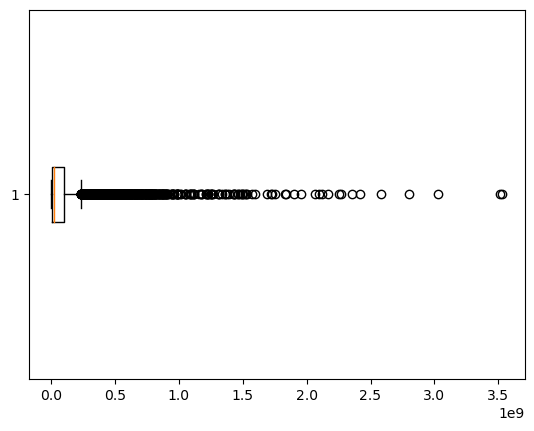

In [25]:
plt.boxplot(df["streams"], vert=False);

# красивое...

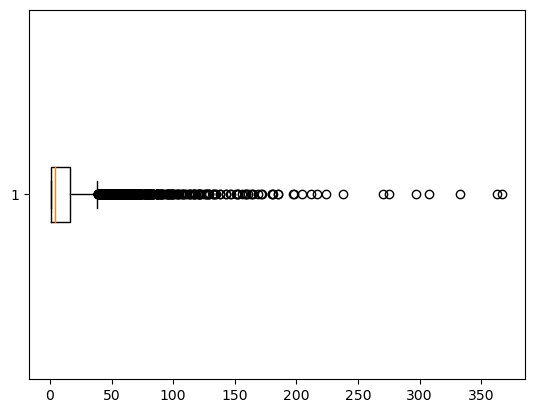

In [27]:
# для наглядности посмотрим и недели в чарте

plt.boxplot(df["weeks_on_chart"], vert=False);

Логично, что в этих переменных будет огромный разброс в значениях, потому что какие-то песни попадают в топ на неделю, а какие-то задерживаются надолго и становятся мегахитами.
А теперь отсортируем и посмотрим топ-5 песен по прослушиваниям и неделям в чарте!

In [29]:
df.sort_values('streams', ascending=False)

,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
435,0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,Blinding Lights,Republic Records,C#/Db,Major,4 beats,0.514,0.730,0.0598,0.00146,0.000095,0.0897,0.334,-5.934,171.005,200040,224,3528450184
6383,7qiZfU4dY1lWllzX7mPBI3,Ed Sheeran,Shape of You,Atlantic Records UK,C#/Db,Minor,4 beats,0.825,0.652,0.0802,0.58100,0.000000,0.0931,0.931,-3.183,95.977,233713,333,3509169565
6378,7qEHsqek33rTcFNT9PFqLf,Lewis Capaldi,Someone You Loved,Vertigo Berlin,C#/Db,Major,4 beats,0.501,0.405,0.0319,0.75100,0.000000,0.1050,0.446,-5.679,109.891,182161,270,3029241037
748,0tgVpDi06FyKpA1z0VMD4v,Ed Sheeran,Perfect,Atlantic Records UK,G#/Ab,Major,3 beats,0.599,0.448,0.0232,0.16300,0.000000,0.1060,0.168,-6.312,95.050,263400,363,2797600939
3523,4Dvkj6JhhA12EX05fT7y2e,Harry Styles,As It Was,Columbia,F#/Gb,Minor,4 beats,0.520,0.731,0.0557,0.34200,0.001010,0.3110,0.662,-5.338,173.930,167303,102,2580052047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4416,5Fim1gaXBgsiFfsQAfQSDS,Nicky Jam,Hasta el Amanecer,Sony Music Latin,F#/Gb,Minor,4 beats,0.832,0.608,0.0385,0.28200,0.000000,0.0761,0.589,-6.042,94.013,198707,1,2630356
1879,2FiSTH0GYpIioUgjfzMIja,"Kygo, Maty Noyes",Stay (feat. Maty Noyes),Kygo,G#/Ab,Major,4 beats,0.648,0.736,0.0385,0.04440,0.000137,0.1710,0.378,-7.948,103.027,239465,1,2598170
968,19a3JfW8BQwqHWUMbcqSx8,Kanye West,Famous,Rock The World/IDJ/Kanye LP7,F#/Gb,Major,4 beats,0.465,0.735,0.1170,0.07110,0.000000,0.0975,0.409,-3.715,173.935,196040,1,2580512
3469,494OU6M7NOf4ICYb4zWCf5,Maroon 5,Sugar,Interscope Records*,C#/Db,Major,4 beats,0.748,0.788,0.0334,0.05910,0.000000,0.0863,0.884,-7.055,120.076,235493,1,2541963


Тут мы видим по 5 песен сверху и снизу — сверху 5 самых прослушиваемых и 5 наименее прослушиваемых. Ну и глянем на лидеров по кол-ву недель (антилидеров смотреть не будем, потому что очевидно это треки, провисевшие в чарте 1 неделю, а их там прилично)

In [31]:
df.sort_values('weeks_on_chart', ascending=False).head()

,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
688,0pqnGHJpmpxLKifKRmU6WP,Imagine Dragons,Believer,Kid Ina Korner / Interscope,A#/Bb,Minor,4 beats,0.776,0.780,0.1280,0.0622,0.0,0.0810,0.666,-4.374,124.949,204347,367,2120386471
748,0tgVpDi06FyKpA1z0VMD4v,Ed Sheeran,Perfect,Atlantic Records UK,G#/Ab,Major,3 beats,0.599,0.448,0.0232,0.1630,0.0,0.1060,0.168,-6.312,95.050,263400,363,2797600939
6383,7qiZfU4dY1lWllzX7mPBI3,Ed Sheeran,Shape of You,Atlantic Records UK,C#/Db,Minor,4 beats,0.825,0.652,0.0802,0.5810,0.0,0.0931,0.931,-3.183,95.977,233713,333,3509169565
752,0u2P5u6lvoDfwTYjAADbn4,"Billie Eilish, Khalid",lovely (with Khalid),Darkroom,E,Minor,4 beats,0.351,0.296,0.0333,0.9340,0.0,0.0950,0.120,-10.109,115.284,200186,308,2417312282
4946,5uCax9HTNlzGybIStD3vDh,James Arthur,Say You Won't Let Go,Columbia,A#/Bb,Major,4 beats,0.358,0.557,0.0590,0.6950,0.0,0.0902,0.494,-7.398,85.043,211467,297,1959283644


# Корреляция

Для начала посчитаем коэффициенты Пирсона между всеми переменными.

In [21]:
df.corr()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
danceability,1.000000,0.132397,0.184578,-0.248447,-0.081519,-0.081186,0.346597,0.188109,-0.058747,-0.155502,0.015205,0.011551
energy,0.132397,1.000000,-0.007855,-0.515303,-0.069500,0.135981,0.375763,0.727379,0.095561,0.013937,0.009613,0.001399
speechiness,0.184578,-0.007855,1.000000,-0.075279,-0.048271,0.055040,0.037357,-0.064261,0.123775,-0.039070,-0.087384,-0.085806
acousticness,-0.248447,-0.515303,-0.075279,1.000000,0.063984,-0.045413,-0.081847,-0.427972,-0.071007,-0.034989,0.004370,0.012926
instrumentalness,-0.081519,-0.069500,-0.048271,0.063984,1.000000,-0.005276,-0.112222,-0.182663,-0.006436,-0.034694,-0.021996,-0.019188
liveness,-0.081186,0.135981,0.055040,-0.045413,-0.005276,1.000000,0.036476,0.059125,-0.002338,0.000673,-0.047156,-0.039445
valence,0.346597,0.375763,0.037357,-0.081847,-0.112222,0.036476,1.000000,0.300003,0.051097,-0.152047,0.041190,0.037192
loudness,0.188109,0.727379,-0.064261,-0.427972,-0.182663,0.059125,0.300003,1.000000,0.066723,0.016177,0.050671,0.035809
tempo,-0.058747,0.095561,0.123775,-0.071007,-0.006436,-0.002338,0.051097,0.066723,1.000000,-0.017492,-0.017994,-0.012052
duration_ms,-0.155502,0.013937,-0.039070,-0.034989,-0.034694,0.000673,-0.152047,0.016177,-0.017492,1.000000,0.031530,0.014761


Можем заметить сильные прямые корреляции между громкостью и энергичностью, стримами и неделями в чарте (спасибо, кэп). Как у стримов, так и у недель нет ярковыраженной корреляции ни с какой другой переменной, так что похоже здесь никакой связи нет. Еще есть небольшие корреляции "веселости" трека с "танцевальностью", энергичностью и громкостью.

Что касается отрицательных корреляций, то у акустичности и энергии наблюдается средняя.

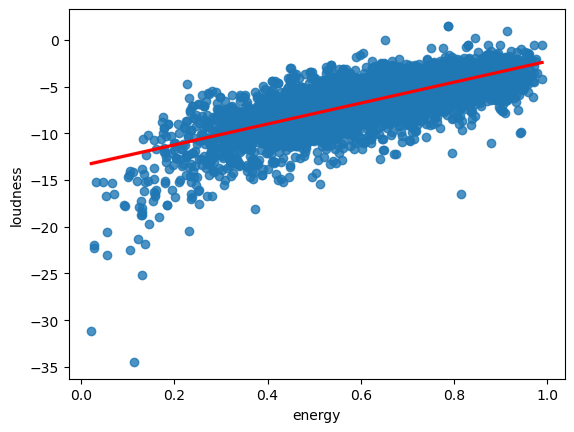

In [32]:
# напоследок совсем красивое: сделаем с помощью сиборна графики по корреляциям сразу с линией регрессии
# начнем с энергичности и громкости

sns.regplot(x=df["energy"], y = df["loudness"], line_kws = {'color':'r'});

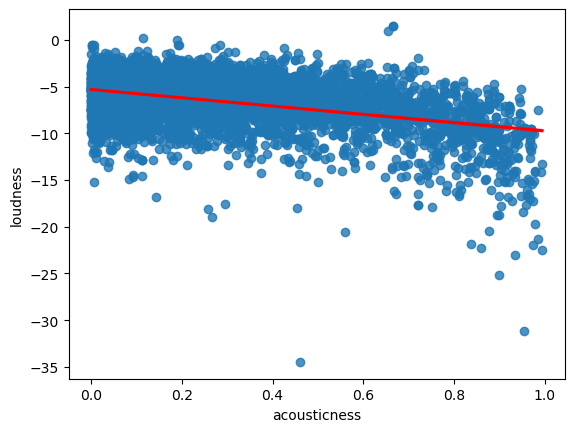

In [33]:
# ради разнообразия посмотрим на среднюю отрицательную корреляцию

sns.regplot(x=df["acousticness"], y = df["loudness"], line_kws = {'color':'r'});